# Proyecto ML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os
import shutil
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
import splitfolders
import seaborn as sns
%matplotlib inline

In [3]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
PATH = r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224'

In [5]:
df_train = pd.read_csv(r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book30-listing-train.csv',encoding = "ISO-8859-1")
df_test = pd.read_csv(r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book30-listing-test.csv',encoding = "ISO-8859-1")

In [6]:
columns = ['id', 'image', 'link', 'name', 'author', 'class', 'genre']
df_train.columns = columns
df_test.columns = columns

In [7]:
df_train.head(20)

,id,image,link,name,author,class,genre
0,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
1,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
2,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
3,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors
4,8436808053,8436808053.jpg,http://ecx.images-amazon.com/images/I/41aDW5pz...,"Como vencer el insomnio. Tecnicas, reglas y co...",Choliz Montanes,11,"Health, Fitness & Dieting"
5,1848291388,1848291388.jpg,http://ecx.images-amazon.com/images/I/51Lpg7xm...,John Martin Littlejohn: An Enigma of Osteopathy,John O'Brien,16,Medical Books
6,73402656,0073402656.jpg,http://ecx.images-amazon.com/images/I/51WccSzF...,Chemistry: The Molecular Nature of Matter and ...,Martin Silberberg,23,Science & Math
7,323045979,0323045979.jpg,http://ecx.images-amazon.com/images/I/51rJir5E...,Mosby's Oncology Nursing Advisor: A Comprehens...,Susan Newton MS RN AOCN AOCNS,16,Medical Books
8,1847176968,1847176968.jpg,http://ecx.images-amazon.com/images/I/61KoC743...,Ireland's Wild Atlantic Way,Carsten Krieger,29,Travel
9,1760342769,1760342769.jpg,http://ecx.images-amazon.com/images/I/515LqScy...,Lonely Planet Israel & the Palestinian Territo...,Lonely Planet,29,Travel


In [8]:
categories = df_train.genre.unique()
categories

array(["Children's Books", 'Engineering & Transportation',
       'Christian Books & Bibles', 'Sports & Outdoors',
       'Health, Fitness & Dieting', 'Medical Books', 'Science & Math',
       'Travel', 'Business & Money', 'Cookbooks, Food & Wine',
       'Politics & Social Sciences', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Literature & Fiction',
       'Humor & Entertainment', 'Law', 'Computers & Technology',
       'Test Preparation', 'Biographies & Memoirs', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)

In [9]:
classes = df_train['class'].unique()
classes

array([ 4, 10,  9, 26, 11, 16, 23, 29,  2,  7, 19,  8, 21, 15, 13, 14,  6,
       28,  1,  0, 18, 22, 12,  5, 20, 27, 25,  3, 24, 17], dtype=int64)

In [10]:
categories_label = dict()
for i in range(len(categories)):
    categories_label[categories[i]] = classes[i]

In [11]:
categories_label

{"Children's Books": 4,
 'Engineering & Transportation': 10,
 'Christian Books & Bibles': 9,
 'Sports & Outdoors': 26,
 'Health, Fitness & Dieting': 11,
 'Medical Books': 16,
 'Science & Math': 23,
 'Travel': 29,
 'Business & Money': 2,
 'Cookbooks, Food & Wine': 7,
 'Politics & Social Sciences': 19,
 'Crafts, Hobbies & Home': 8,
 'Religion & Spirituality': 21,
 'Literature & Fiction': 15,
 'Humor & Entertainment': 13,
 'Law': 14,
 'Computers & Technology': 6,
 'Test Preparation': 28,
 'Biographies & Memoirs': 1,
 'Arts & Photography': 0,
 'Parenting & Relationships': 18,
 'Romance': 22,
 'History': 12,
 'Comics & Graphic Novels': 5,
 'Reference': 20,
 'Teen & Young Adult': 27,
 'Self-Help': 25,
 'Calendars': 3,
 'Science Fiction & Fantasy': 24,
 'Mystery, Thriller & Suspense': 17}

In [12]:
import shutil
for image in df_train['image']:
    shutil.copy(PATH + '\\' + image, 
                    r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224\train')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\batch-pc\\Documents\\Data science ft\\ds_ft_sep_22\\3-Machine_Learning\\Proyecto_ML\\Data\\book_master\\224x224\\1404803335.jpg'

In [15]:
for image in df_test['image']:
    shutil.copy(PATH + '\\' + image, 
                    r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224\test')

In [13]:
df_train['name'].value_counts()

The Tibetan Book of the Dead                                                                                          4
2015 Metropolitan Maps Wall Calendar TF Publishing {jg}                                                               3
Dracula                                                                                                               3
Private Independent Schools                                                                                           3
Bankruptcy (University Casebook Series)                                                                               3
                                                                                                                     ..
Eyes to See: U.S. Volunteers in Nicaragua                                                                             1
Key West: Part II (Volume 2)                                                                                          1
E-Learning for Law Firms                

In [13]:
df_train.drop_duplicates(subset='name',inplace=True)

In [14]:
df_test.drop_duplicates(subset='name',inplace=True)

In [15]:
len(df_train.name)

51000

In [16]:
df_train.head(10)

,id,image,link,name,author,class,genre
0,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
1,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
2,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
3,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors
4,8436808053,8436808053.jpg,http://ecx.images-amazon.com/images/I/41aDW5pz...,"Como vencer el insomnio. Tecnicas, reglas y co...",Choliz Montanes,11,"Health, Fitness & Dieting"
5,1848291388,1848291388.jpg,http://ecx.images-amazon.com/images/I/51Lpg7xm...,John Martin Littlejohn: An Enigma of Osteopathy,John O'Brien,16,Medical Books
6,73402656,0073402656.jpg,http://ecx.images-amazon.com/images/I/51WccSzF...,Chemistry: The Molecular Nature of Matter and ...,Martin Silberberg,23,Science & Math
7,323045979,0323045979.jpg,http://ecx.images-amazon.com/images/I/51rJir5E...,Mosby's Oncology Nursing Advisor: A Comprehens...,Susan Newton MS RN AOCN AOCNS,16,Medical Books
8,1847176968,1847176968.jpg,http://ecx.images-amazon.com/images/I/61KoC743...,Ireland's Wild Atlantic Way,Carsten Krieger,29,Travel
9,1760342769,1760342769.jpg,http://ecx.images-amazon.com/images/I/515LqScy...,Lonely Planet Israel & the Palestinian Territo...,Lonely Planet,29,Travel


In [17]:
categories_label

{"Children's Books": 4,
 'Engineering & Transportation': 10,
 'Christian Books & Bibles': 9,
 'Sports & Outdoors': 26,
 'Health, Fitness & Dieting': 11,
 'Medical Books': 16,
 'Science & Math': 23,
 'Travel': 29,
 'Business & Money': 2,
 'Cookbooks, Food & Wine': 7,
 'Politics & Social Sciences': 19,
 'Crafts, Hobbies & Home': 8,
 'Religion & Spirituality': 21,
 'Literature & Fiction': 15,
 'Humor & Entertainment': 13,
 'Law': 14,
 'Computers & Technology': 6,
 'Test Preparation': 28,
 'Biographies & Memoirs': 1,
 'Arts & Photography': 0,
 'Parenting & Relationships': 18,
 'Romance': 22,
 'History': 12,
 'Comics & Graphic Novels': 5,
 'Reference': 20,
 'Teen & Young Adult': 27,
 'Self-Help': 25,
 'Calendars': 3,
 'Science Fiction & Fantasy': 24,
 'Mystery, Thriller & Suspense': 17}

In [18]:
genres

NameError: name 'genres' is not defined

In [19]:
classes

array([ 4, 10,  9, 26, 11, 16, 23, 29,  2,  7, 19,  8, 21, 15, 13, 14,  6,
       28,  1,  0, 18, 22, 12,  5, 20, 27, 25,  3, 24, 17], dtype=int64)

Prueba con 10 categorías:

In [20]:
categories10 = np.array(['Sports & Outdoors','Medical Books', 'Science & Math',
                        'Cookbooks, Food & Wine','Crafts, Hobbies & Home',
                        'Religion & Spirituality', 'Arts & Photography',
                        'Comics & Graphic Novels','Science Fiction & Fantasy',
                        'Mystery, Thriller & Suspense'])

In [161]:
classes10 = df_train10['class'].unique()

In [162]:
categories_label10 = dict()
for i in range(len(categories10)):
    categories_label10[categories10[i]] = classes10[i]
categories_label10

{'Sports & Outdoors': 26,
 'Medical Books': 16,
 'Science & Math': 23,
 'Cookbooks, Food & Wine': 7,
 'Crafts, Hobbies & Home': 8,
 'Religion & Spirituality': 21,
 'Arts & Photography': 0,
 'Comics & Graphic Novels': 5,
 'Science Fiction & Fantasy': 24,
 'Mystery, Thriller & Suspense': 17}

In [186]:
list1 = [0,5,7,8,16,17,21,23,24,26]

In [18]:
df_train10 = df_train.loc[(df_train['genre'].isin(['Sports & Outdoors','Medical Books', 'Science & Math',
                        'Cookbooks, Food & Wine','Crafts, Hobbies & Home',
                        'Religion & Spirituality', 'Arts & Photography',
                        'Comics & Graphic Novels','Science Fiction & Fantasy',
                        'Mystery, Thriller & Suspense']))]
df_train10

,id,image,link,name,author,class,genre
3,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors
5,1848291388,1848291388.jpg,http://ecx.images-amazon.com/images/I/51Lpg7xm...,John Martin Littlejohn: An Enigma of Osteopathy,John O'Brien,16,Medical Books
6,73402656,0073402656.jpg,http://ecx.images-amazon.com/images/I/51WccSzF...,Chemistry: The Molecular Nature of Matter and ...,Martin Silberberg,23,Science & Math
7,323045979,0323045979.jpg,http://ecx.images-amazon.com/images/I/51rJir5E...,Mosby's Oncology Nursing Advisor: A Comprehens...,Susan Newton MS RN AOCN AOCNS,16,Medical Books
11,806965339,0806965339.jpg,http://ecx.images-amazon.com/images/I/71SDZJBG...,"Breads, Cakes, Rolls & More from Your Bread Ma...",Rob Wanless,7,"Cookbooks, Food & Wine"
...,...,...,...,...,...,...,...
51294,399176055,0399176055.jpg,http://ecx.images-amazon.com/images/I/51iT8yFN...,Extreme Prey,John Sandford,17,"Mystery, Thriller & Suspense"
51295,719816629,0719816629.jpg,http://ecx.images-amazon.com/images/I/51Z%2B3H...,The Crime Writer's Guide to Police Practice an...,Michael O'Byrne,17,"Mystery, Thriller & Suspense"
51296,385353596,0385353596.jpg,http://ecx.images-amazon.com/images/I/51iNYVpL...,The Jezebel Remedy: A novel,Martin Clark,17,"Mystery, Thriller & Suspense"
51297,1475988559,1475988559.jpg,http://ecx.images-amazon.com/images/I/41eQk3x-...,Startup,Glenn Ogura,17,"Mystery, Thriller & Suspense"


In [19]:
df_test10 = df_test.loc[(df_test['genre'].isin(['Sports & Outdoors','Medical Books', 'Science & Math',
                        'Cookbooks, Food & Wine','Crafts, Hobbies & Home',
                        'Religion & Spirituality', 'Arts & Photography',
                        'Comics & Graphic Novels','Science Fiction & Fantasy',
                        'Mystery, Thriller & Suspense']))]
df_test10

,id,image,link,name,author,class,genre
2,1580237959,1580237959.jpg,http://ecx.images-amazon.com/images/I/51pum0eW...,"A Partner in Holiness: Deepening Mindfulness, ...",Rabbi Jonathan P. Slater DMin,21,Religion & Spirituality
3,135137829,0135137829.jpg,http://ecx.images-amazon.com/images/I/51PuTPPC...,Construction Scheduling: Principles and Practi...,Jay S. Newitt,0,Arts & Photography
6,521456924,0521456924.jpg,http://ecx.images-amazon.com/images/I/41n7iZq-...,Diagrammatica: The Path to Feynman Diagrams (C...,Martinus Veltman,23,Science & Math
15,962904201,0962904201.jpg,http://ecx.images-amazon.com/images/I/51bWdcsb...,Oregon High: A Climbing Guide to Nine Cascade ...,Jeff Thomas,26,Sports & Outdoors
17,1514196239,1514196239.jpg,http://ecx.images-amazon.com/images/I/5178fq2D...,Anti Inflammatory Cookbook - 50 Slow Cooker Re...,Kate Marsh,7,"Cookbooks, Food & Wine"
...,...,...,...,...,...,...,...
5694,399174680,0399174680.jpg,http://ecx.images-amazon.com/images/I/51JLVnuX...,Scandalous Behavior (A Stone Barrington Novel),Stuart Woods,17,"Mystery, Thriller & Suspense"
5695,1939454654,1939454654.jpg,http://ecx.images-amazon.com/images/I/417gaArF...,Age of Distraction: The Island,Patricia Mahon,17,"Mystery, Thriller & Suspense"
5696,1604601604,1604601604.jpg,http://ecx.images-amazon.com/images/I/51BJw1DW...,The Ghostly Quilts on Main (Colebridge Communi...,Ann Hazelwood,17,"Mystery, Thriller & Suspense"
5697,399166726,0399166726.jpg,http://ecx.images-amazon.com/images/I/51IQRzWX...,Saving Jason (A Jason Stafford Novel),Michael Sears,17,"Mystery, Thriller & Suspense"


In [24]:
image_size = 224
batch_size = 64
epochs = 20

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1
                                  )
#usar flow o organizar las categorias en carpetas?
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train10, directory='data/train/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre',
                                                    batch_size = batch_size, target_size=(image_size,image_size), 
                                                    subset = 'training', shuffle=True, seed=42)
validation_generator = train_datagen.flow_from_dataframe(dataframe=df_train10, directory='data/train/', class_mode='categorical',
                                                        x_col = 'image', y_col = 'genre',
                                                        batch_size = batch_size, target_size=(image_size,image_size),
                                                        subset = 'validation', shuffle = True, seed=42)
test_datagen = ImageDataGenerator(rescale=1./255)

NameError: name 'df_train10' is not defined

In [29]:
xception_model = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=30,
    classifier_activation='softmax'
    )
tf.random.set_seed(73)
model = Sequential()
model.add(xception_model)
model.add(Flatten()) 
model.add(Dense(units=2048, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
save_best = ModelCheckpoint(
filepath = '10clases_xc.hdf5',
verbose=1, save_best_only=True
)

In [32]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\
                         validation_steps = validation_generator.samples // batch_size, epochs = epochs, callbacks=[save_best,early_stopping], verbose=2)

C:\Users\batch-pc\AppData\Local\Temp\ipykernel_15304\2639075760.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\


Epoch 1/20

Epoch 1: val_loss improved from inf to 1.72275, saving model to 10clases_xc.hdf5
239/239 - 108s - loss: 1.8351 - accuracy: 0.3601 - val_loss: 1.7228 - val_accuracy: 0.4050 - 108s/epoch - 454ms/step
Epoch 2/20

Epoch 2: val_loss improved from 1.72275 to 1.67200, saving model to 10clases_xc.hdf5
239/239 - 100s - loss: 1.6465 - accuracy: 0.4346 - val_loss: 1.6720 - val_accuracy: 0.4189 - 100s/epoch - 416ms/step
Epoch 3/20

Epoch 3: val_loss did not improve from 1.67200
239/239 - 101s - loss: 1.5874 - accuracy: 0.4528 - val_loss: 1.6855 - val_accuracy: 0.4123 - 101s/epoch - 421ms/step
Epoch 4/20

Epoch 4: val_loss did not improve from 1.67200
239/239 - 104s - loss: 1.5394 - accuracy: 0.4681 - val_loss: 1.6814 - val_accuracy: 0.4069 - 104s/epoch - 434ms/step
Epoch 5/20

Epoch 5: val_loss improved from 1.67200 to 1.63852, saving model to 10clases_xc.hdf5
239/239 - 103s - loss: 1.4935 - accuracy: 0.4911 - val_loss: 1.6385 - val_accuracy: 0.4375 - 103s/epoch - 431ms/step
Epoch 6/20

In [25]:
model10 = keras.models.load_model('10clases_xc.hdf5')

In [26]:
test_dir = r'C:\Users\batch-pc\Documents\Data science ft\ds_ft_sep_22\3-Machine_Learning\Proyecto_ML\Data\book_master\224x224\test'

In [27]:
test_generator10 = test_datagen.flow_from_dataframe(dataframe=df_test10, directory='data/test/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre', color_mode='rgb',
                                                    batch_size = 1, target_size=(224,224), 
                                                        shuffle=False, seed=42)

filenames = test_generator10.filenames
nb_samples = len(filenames)

prediction = model10.predict_generator(test_generator10,steps = nb_samples)

NameError: name 'test_datagen' is not defined

In [38]:
print(model10.evaluate(validation_generator))

27/27 [==============================] - 11s 379ms/step - loss: 1.6344 - accuracy: 0.4512
[1.6344352960586548, 0.451233834028244]


In [191]:
prediction = model10.predict(test_generator10,steps = nb_samples)

1899/1899 [==============================] - 10s 5ms/step


In [39]:
print(model10.evaluate(test_generator))

1899/1899 [==============================] - 13s 7ms/step - loss: 1.6279 - accuracy: 0.4508
[1.6279429197311401, 0.4507635533809662]


In [42]:
pred_labels = np.argmax(prediction, axis=1)

In [65]:
pred_labels[5]

3

In [70]:
categories10[pred_labels[7]]

'Arts & Photography'

In [67]:
prediction[5]

array([0.01612056, 0.0094033 , 0.31856114, 0.3361783 , 0.03778597,
       0.04444046, 0.02594026, 0.12418631, 0.02284987, 0.0645337 ],
      dtype=float32)

In [163]:
categories10

array(['Sports & Outdoors', 'Medical Books', 'Science & Math',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Arts & Photography',
       'Comics & Graphic Novels', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype='<U28')

In [45]:
df_test10.head(10)

,id,image,link,name,author,class,genre
2,1580237959,1580237959.jpg,http://ecx.images-amazon.com/images/I/51pum0eW...,"A Partner in Holiness: Deepening Mindfulness, ...",Rabbi Jonathan P. Slater DMin,21,Religion & Spirituality
3,135137829,0135137829.jpg,http://ecx.images-amazon.com/images/I/51PuTPPC...,Construction Scheduling: Principles and Practi...,Jay S. Newitt,0,Arts & Photography
6,521456924,0521456924.jpg,http://ecx.images-amazon.com/images/I/41n7iZq-...,Diagrammatica: The Path to Feynman Diagrams (C...,Martinus Veltman,23,Science & Math
15,962904201,0962904201.jpg,http://ecx.images-amazon.com/images/I/51bWdcsb...,Oregon High: A Climbing Guide to Nine Cascade ...,Jeff Thomas,26,Sports & Outdoors
17,1514196239,1514196239.jpg,http://ecx.images-amazon.com/images/I/5178fq2D...,Anti Inflammatory Cookbook - 50 Slow Cooker Re...,Kate Marsh,7,"Cookbooks, Food & Wine"
18,079382883X,079382883X.jpg,http://ecx.images-amazon.com/images/I/51zi2q5J...,Leopard Geckos (Complete Herp Care),Gerald Merker,8,"Crafts, Hobbies & Home"
24,1932234969,1932234969.jpg,http://ecx.images-amazon.com/images/I/51IybjCl...,5 Centimeters per Second,NaN,5,Comics & Graphic Novels
27,471041386,0471041386.jpg,http://ecx.images-amazon.com/images/I/41aVeVve...,Polymeric Multicomponent Materials: An Introdu...,L. H. Sperling,23,Science & Math
33,1932564462,1932564462.jpg,http://ecx.images-amazon.com/images/I/51TLjyIj...,Shadowrun: Third Edition (FPR25000),FanPro,24,Science Fiction & Fantasy
34,982565062,0982565062.jpg,http://ecx.images-amazon.com/images/I/51uJz4Jd...,The Crime Wave: Collected Nonfiction (The Ace ...,Dashiell Hammett,17,"Mystery, Thriller & Suspense"


In [30]:
print(predict[0].t

array([0.02048927, 0.00370287, 0.08557708, 0.04041117, 0.4412535 ,
       0.01485839, 0.11249734, 0.2416857 , 0.01000007, 0.02952462],
      dtype=float32)

In [56]:
from sklearn.metrics import confusion_matrix

In [71]:
genres = df_train10['genre'].unique()
genres

array(['Sports & Outdoors', 'Medical Books', 'Science & Math',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Arts & Photography',
       'Comics & Graphic Novels', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)

In [72]:
categories10

array(['Sports & Outdoors', 'Medical Books', 'Science & Math',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Arts & Photography',
       'Comics & Graphic Novels', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype='<U28')

In [164]:
cat10 = list(categories10)
cat10

['Sports & Outdoors',
 'Medical Books',
 'Science & Math',
 'Cookbooks, Food & Wine',
 'Crafts, Hobbies & Home',
 'Religion & Spirituality',
 'Arts & Photography',
 'Comics & Graphic Novels',
 'Science Fiction & Fantasy',
 'Mystery, Thriller & Suspense']

In [196]:
y_test10 = []
for i in df_test10['genre']:
    index = categories_label10.get(i)
    ind = list1.index(index)
    y_test10.append(ind)

In [166]:
df_test10['class'].value_counts()

21    190
0     190
23    190
26    190
7     190
8     190
5     190
24    190
17    190
16    189
Name: class, dtype: int64

In [167]:
df_train10['class'].value_counts()

8     1709
5     1709
7     1706
16    1705
0     1705
21    1703
24    1702
23    1699
26    1696
17    1693
Name: class, dtype: int64

In [197]:
#Predict
y_prediction = prediction
y_prediction = np.argmax (y_prediction, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test10, y_prediction)
print(result)

[[ 39  29  11  39  14  12  14   9   5  18]
 [  3 139   5   9   1   8   6   2  13   4]
 [  2   9 121  23   8   5  11   1   1   9]
 [ 11   8  19 108  15   1  12   7   5   4]
 [  4   5  10  16 101  10  24  12   0   7]
 [  5  16   8  18  10  91  18   5  14   5]
 [ 11   7   7  20  25  17  79  10  10   4]
 [ 11   9   6  25  57   7  29  23   5  18]
 [ 11  36   6   9   5  28  14   1  76   4]
 [ 10  12   8  19  22  10  13  10   7  79]]


<AxesSubplot: >

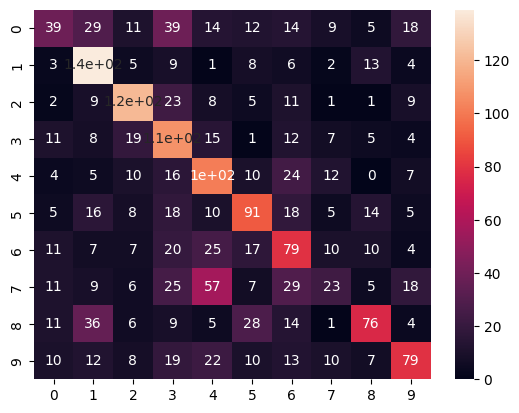

In [198]:
sns.heatmap(result, annot=True)

In [200]:
print(top_k_accuracy_score(y_test10, prediction, k=3, normalize=True))
print(top_k_accuracy_score(y_test10, prediction, k=5, normalize=True))
print(top_k_accuracy_score(y_test10, prediction, k=7, normalize=True))
print(top_k_accuracy_score(y_test10, prediction, k=10, normalize=True))

0.7414428646656135
0.8709847288046341
0.9436545550289626
1.0


c:\Users\batch-pc\anaconda3\envs\bootcamp_core\lib\site-packages\sklearn\metrics\_ranking.py:1777: UndefinedMetricWarning: 'k' (10) greater than or equal to 'n_classes' (10) will result in a perfect score and is therefore meaningless.
  warnings.warn(


# 30 CLASES

In [28]:
image_size = 224
batch_size = 64
epochs = 20

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1
                                  )
#usar flow o organizar las categorias en carpetas?
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre',
                                                    batch_size = batch_size, target_size=(image_size,image_size), 
                                                    subset = 'training', shuffle=True, seed=42)
validation_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                        x_col = 'image', y_col = 'genre',
                                                        batch_size = batch_size, target_size=(image_size,image_size),
                                                        subset = 'validation', shuffle = True, seed=42)
test_datagen = ImageDataGenerator(rescale=1./255)

Found 45900 validated image filenames belonging to 30 classes.
Found 5100 validated image filenames belonging to 30 classes.


In [17]:
xception_model = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=30,
    classifier_activation='softmax'
    )
tf.random.set_seed(73)
model = Sequential()
model.add(xception_model)
model.add(Flatten()) 
model.add(Dense(units=2048, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, activation='softmax'))
model.layers[0].trainable=False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
save_best = ModelCheckpoint(
filepath = 'master.hdf5',
verbose=1, save_best_only=True
)

In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\
                         validation_steps = validation_generator.samples // batch_size, epochs = epochs, callbacks=[save_best,early_stopping], verbose=2)

Epoch 1/20


C:\Users\batch-pc\AppData\Local\Temp\ipykernel_18240\2639075760.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\



Epoch 1: val_loss improved from inf to 2.82882, saving model to master.hdf5
721/721 - 190s - loss: 2.9473 - accuracy: 0.1828 - val_loss: 2.8288 - val_accuracy: 0.1936 - 190s/epoch - 264ms/step
Epoch 2/20

Epoch 2: val_loss improved from 2.82882 to 2.78885, saving model to master.hdf5
721/721 - 133s - loss: 2.7277 - accuracy: 0.2384 - val_loss: 2.7888 - val_accuracy: 0.2102 - 133s/epoch - 185ms/step
Epoch 3/20

Epoch 3: val_loss improved from 2.78885 to 2.73573, saving model to master.hdf5
721/721 - 133s - loss: 2.6267 - accuracy: 0.2627 - val_loss: 2.7357 - val_accuracy: 0.2230 - 133s/epoch - 184ms/step
Epoch 4/20

Epoch 4: val_loss improved from 2.73573 to 2.72516, saving model to master.hdf5
721/721 - 133s - loss: 2.5325 - accuracy: 0.2849 - val_loss: 2.7252 - val_accuracy: 0.2293 - 133s/epoch - 185ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 2.72516
721/721 - 133s - loss: 2.4333 - accuracy: 0.3115 - val_loss: 2.7269 - val_accuracy: 0.2346 - 133s/epoch - 184ms/step
Epo

In [29]:
image_size = 224
batch_size = 64
epochs = 20

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.1
                                  )
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre',
                                                    batch_size = batch_size, target_size=(image_size,image_size), 
                                                    subset = 'training', shuffle=True, seed=42)
validation_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory='data/train/', class_mode='categorical',
                                                        x_col = 'image', y_col = 'genre',
                                                        batch_size = batch_size, target_size=(image_size,image_size),
                                                        subset = 'validation', shuffle = True, seed=42)

Found 45900 validated image filenames belonging to 30 classes.
Found 5100 validated image filenames belonging to 30 classes.


In [22]:
xception_model = tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling='avg',
    classes=30,
    classifier_activation='softmax'
    )
tf.random.set_seed(73)
model = Sequential()
model.add(xception_model)
model.add(Flatten()) 
model.add(Dense(units=2048, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='softmax'))
model.layers[0].trainable=False
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)              

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
save_best = ModelCheckpoint(
filepath = 'master_drop03.hdf5',
verbose=1, save_best_only=True
)

In [25]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\
                         validation_steps = validation_generator.samples // batch_size, epochs = epochs, callbacks=[save_best,early_stopping], verbose=2)

C:\Users\batch-pc\AppData\Local\Temp\ipykernel_18240\2639075760.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, validation_data = validation_generator,\


Epoch 1/20

Epoch 1: val_loss improved from inf to 2.90858, saving model to master_drop03.hdf5
721/721 - 352s - loss: 3.0256 - accuracy: 0.1627 - val_loss: 2.9086 - val_accuracy: 0.1703 - 352s/epoch - 488ms/step
Epoch 2/20

Epoch 2: val_loss improved from 2.90858 to 2.81525, saving model to master_drop03.hdf5
721/721 - 455s - loss: 2.8223 - accuracy: 0.2159 - val_loss: 2.8153 - val_accuracy: 0.2070 - 455s/epoch - 631ms/step
Epoch 3/20

Epoch 3: val_loss improved from 2.81525 to 2.80068, saving model to master_drop03.hdf5
721/721 - 412s - loss: 2.7544 - accuracy: 0.2304 - val_loss: 2.8007 - val_accuracy: 0.2051 - 412s/epoch - 571ms/step
Epoch 4/20

Epoch 4: val_loss improved from 2.80068 to 2.76479, saving model to master_drop03.hdf5
721/721 - 381s - loss: 2.7062 - accuracy: 0.2458 - val_loss: 2.7648 - val_accuracy: 0.2146 - 381s/epoch - 529ms/step
Epoch 5/20

Epoch 5: val_loss improved from 2.76479 to 2.74157, saving model to master_drop03.hdf5
721/721 - 419s - loss: 2.6604 - accuracy:

In [26]:
model.save('model17e.hdf5')

In [ ]:
#sacar el top 3 de categorias y comprobar la accuracy

In [ ]:
#hacer un transformer con imagenes y titulos para determinar el genero

In [ ]:
#resnet50 con los params de resnet_cover

In [21]:
model30 = keras.models.load_model('master_drop03.hdf5')

In [36]:
test_generator = test_datagen.flow_from_dataframe(dataframe=df_test, directory='data/test/', class_mode='categorical',
                                                    x_col = 'image', y_col = 'genre', color_mode='rgb',
                                                    batch_size = 1, target_size=(224,224), 
                                                        shuffle=False, seed=42)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model30.predict(test_generator,steps = nb_samples)

Found 5694 validated image filenames belonging to 30 classes.
5694/5694 [==============================] - 31s 5ms/step


In [37]:
predict[0]

array([6.3770458e-06, 1.5888564e-06, 1.6799316e-04, 6.0338953e-06,
       1.1810267e-05, 4.8478346e-06, 3.3163579e-07, 5.7720812e-04,
       3.9690835e-06, 4.5952074e-06, 1.1412372e-05, 1.2332381e-04,
       1.5724107e-06, 2.7759810e-05, 6.4141510e-05, 6.8558654e-07,
       1.3135379e-04, 6.7224977e-07, 1.7545208e-04, 1.4851316e-05,
       6.0831162e-04, 6.2132398e-07, 3.9639102e-07, 8.4588064e-06,
       3.4066272e-07, 2.7627413e-05, 5.2289874e-06, 7.8568264e-05,
       9.9792993e-01, 4.3915697e-06], dtype=float32)

In [ ]:
print(model30.evaluate(train_generator))

718/718 [==============================] - 311s 431ms/step - loss: 2.1935 - accuracy: 0.3767
[2.193486452102661, 0.3766666650772095]


In [114]:
print(model30.evaluate(test_generator))

5694/5694 [==============================] - 37s 7ms/step - loss: 2.6884 - accuracy: 0.2543
[2.688372850418091, 0.2543027698993683]


In [38]:
genres = df_train['genre'].unique()
genres

array(["Children's Books", 'Engineering & Transportation',
       'Christian Books & Bibles', 'Sports & Outdoors',
       'Health, Fitness & Dieting', 'Medical Books', 'Science & Math',
       'Travel', 'Business & Money', 'Cookbooks, Food & Wine',
       'Politics & Social Sciences', 'Crafts, Hobbies & Home',
       'Religion & Spirituality', 'Literature & Fiction',
       'Humor & Entertainment', 'Law', 'Computers & Technology',
       'Test Preparation', 'Biographies & Memoirs', 'Arts & Photography',
       'Parenting & Relationships', 'Romance', 'History',
       'Comics & Graphic Novels', 'Reference', 'Teen & Young Adult',
       'Self-Help', 'Calendars', 'Science Fiction & Fantasy',
       'Mystery, Thriller & Suspense'], dtype=object)

In [39]:
cat = list(genres)
cat

["Children's Books",
 'Engineering & Transportation',
 'Christian Books & Bibles',
 'Sports & Outdoors',
 'Health, Fitness & Dieting',
 'Medical Books',
 'Science & Math',
 'Travel',
 'Business & Money',
 'Cookbooks, Food & Wine',
 'Politics & Social Sciences',
 'Crafts, Hobbies & Home',
 'Religion & Spirituality',
 'Literature & Fiction',
 'Humor & Entertainment',
 'Law',
 'Computers & Technology',
 'Test Preparation',
 'Biographies & Memoirs',
 'Arts & Photography',
 'Parenting & Relationships',
 'Romance',
 'History',
 'Comics & Graphic Novels',
 'Reference',
 'Teen & Young Adult',
 'Self-Help',
 'Calendars',
 'Science Fiction & Fantasy',
 'Mystery, Thriller & Suspense']

In [40]:
y_test = []
for i in df_test.genre:
    ind = categories_label.get(i)
    y_test.append(ind)

In [41]:
pred_labels = np.argmax(predict, axis=1)

In [42]:
len(pred_labels)

5694

In [43]:
df_test.head(10)

,id,image,link,name,author,class,genre
0,1438005687,1438005687.jpg,http://ecx.images-amazon.com/images/I/510l0qhi...,"Barron's GRE, 21st Edition",Sharon Weiner Green M.A.,28,Test Preparation
1,60750715,0060750715.jpg,http://ecx.images-amazon.com/images/I/51p5aUY%...,George Balanchine: The Ballet Maker (Eminent L...,Robert Gottlieb,1,Biographies & Memoirs
2,1580237959,1580237959.jpg,http://ecx.images-amazon.com/images/I/51pum0eW...,"A Partner in Holiness: Deepening Mindfulness, ...",Rabbi Jonathan P. Slater DMin,21,Religion & Spirituality
3,135137829,0135137829.jpg,http://ecx.images-amazon.com/images/I/51PuTPPC...,Construction Scheduling: Principles and Practi...,Jay S. Newitt,0,Arts & Photography
4,312556411,0312556411.jpg,http://ecx.images-amazon.com/images/I/51uNnIlI...,Literature and Its Writers: A Compact Introduc...,Ann Charters,15,Literature & Fiction
5,393339157,0393339157.jpg,http://ecx.images-amazon.com/images/I/51VIlqRy...,Straight on Till Morning: The Life of Beryl Ma...,Mary S. Lovell,10,Engineering & Transportation
6,521456924,0521456924.jpg,http://ecx.images-amazon.com/images/I/41n7iZq-...,Diagrammatica: The Path to Feynman Diagrams (C...,Martinus Veltman,23,Science & Math
7,898699223,0898699223.jpg,http://ecx.images-amazon.com/images/I/41xLYt-v...,Book of Common Prayer 1979: Large Print edition,NaN,9,Christian Books & Bibles
8,545700272,0545700272.jpg,http://ecx.images-amazon.com/images/I/51KyLXcz...,A Handful of Stars,Cynthia Lord,4,Children's Books
9,1616494441,1616494441.jpg,http://ecx.images-amazon.com/images/I/51Jku59B...,Almost Anorexic: Is My (or My Loved One's) Rel...,Ph.D. Jennifer J Thomas,25,Self-Help


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
y_prediction = predict
y_prediction = np.argmax (y_prediction, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction)
print(result)

[[ 23   3   0  17   4   2  17   5   2  15   9   0  16   3   6   7   2   9
    4   4   4   2  12   4   5   3   2   4   0   5]
 [  4  37   3   1   2   4   3   1   0   4   4   0  30   5   4  11   2  10
   10   2   0   7  14   1   3   8   7   8   0   5]
 [  5   5  11   4   1   6   0  15   0   7  10   0   8   7  12   3   6  11
    5   6   6   4   2   5   1  21   4   6  12   7]
 [  2   3   0  76  19   5  13   0   6   9   2   0   3   6   1   2   1   4
    1   0   1   3   7   4   3   6   4   3   1   5]
 [  3   0   1  15  71   0  20   0   0  12   7   0   4   4   1   3   0   2
   10   1   1   5   6   1   8   0   4   6   0   5]
 [  2   0   0   8  17   1 117   1   0   4   3   0   4   3   0   2   0   1
    2   0   0   3   4   1  11   1   1   2   0   2]
 [  4   0   2   4   3   1   1  60   0   3   8   0   3   5   7   1  11   2
    6   3   8   2   2  17   1   6   1   4  21   4]
 [  0   4   0  10  12   2   2   1  84  22   2   1   2   6   1   1   1   4
   12   1   3   2   1   0   1   5   1   0   3   6]


<AxesSubplot: >

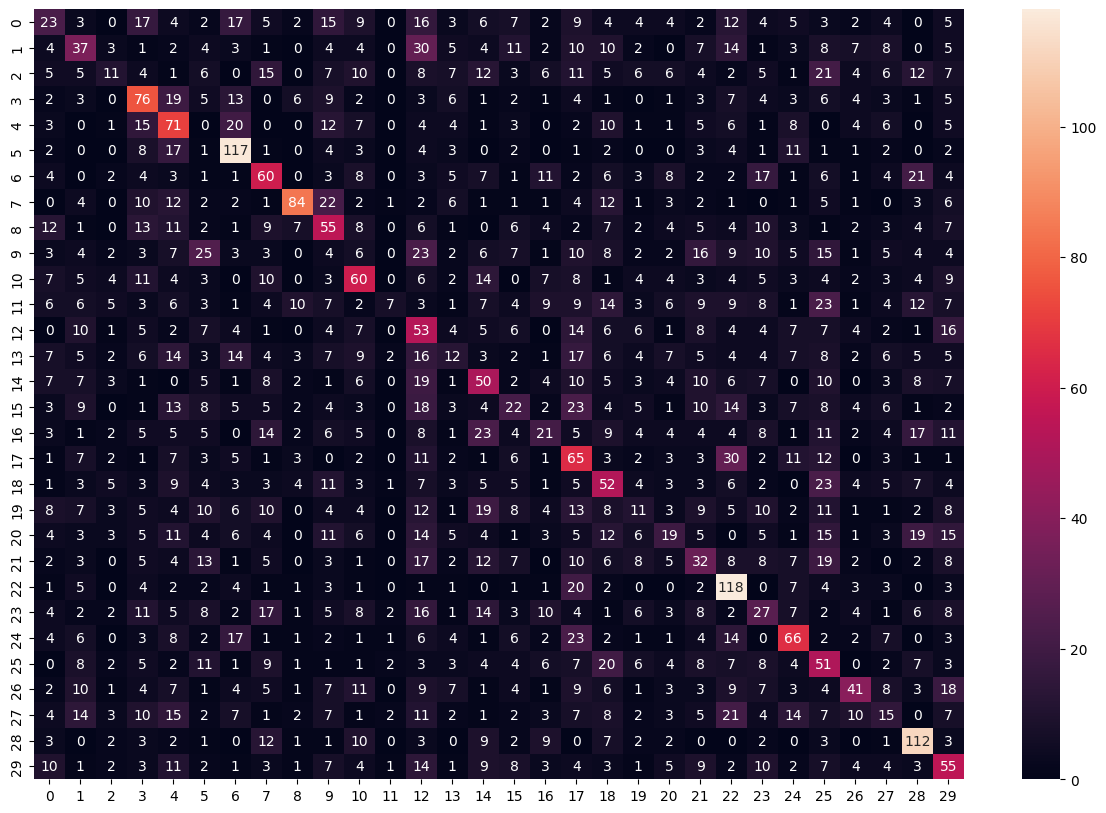

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(result,annot=True,fmt='g')

In [49]:
def predict_top_k(index,k):
    p = (predict[index])
    ind =(-p).argsort()[:k]
    for i in ind:
        print(categories[i])

In [50]:
predict_top_k(1,3)

History
Test Preparation
Calendars


In [51]:
df_test.head(5)

,id,image,link,name,author,class,genre
0,1438005687,1438005687.jpg,http://ecx.images-amazon.com/images/I/510l0qhi...,"Barron's GRE, 21st Edition",Sharon Weiner Green M.A.,28,Test Preparation
1,60750715,0060750715.jpg,http://ecx.images-amazon.com/images/I/51p5aUY%...,George Balanchine: The Ballet Maker (Eminent L...,Robert Gottlieb,1,Biographies & Memoirs
2,1580237959,1580237959.jpg,http://ecx.images-amazon.com/images/I/51pum0eW...,"A Partner in Holiness: Deepening Mindfulness, ...",Rabbi Jonathan P. Slater DMin,21,Religion & Spirituality
3,135137829,0135137829.jpg,http://ecx.images-amazon.com/images/I/51PuTPPC...,Construction Scheduling: Principles and Practi...,Jay S. Newitt,0,Arts & Photography
4,312556411,0312556411.jpg,http://ecx.images-amazon.com/images/I/51uNnIlI...,Literature and Its Writers: A Compact Introduc...,Ann Charters,15,Literature & Fiction


In [52]:
from sklearn.metrics import top_k_accuracy_score

In [53]:
print(top_k_accuracy_score(y_test, predict, k=3, normalize=True))
print(top_k_accuracy_score(y_test, predict, k=5, normalize=True))
print(top_k_accuracy_score(y_test, predict, k=7, normalize=True))
print(top_k_accuracy_score(y_test, predict, k=10, normalize=True))

0.37074113101510364
0.48261327713382507
0.5616438356164384
0.672813487881981
